<a href="https://colab.research.google.com/github/aghapygad336/MENA/blob/master/MENA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
data2015 = pd.read_csv('/content/drive/My Drive/MENA/2015.csv',encoding = "ISO-8859-1", engine = 'python')
dataLabels2015=np.array(data2015.columns)
data2016 = pd.read_csv('/content/drive/My Drive/MENA/2016.csv',encoding = "ISO-8859-1", engine = 'python')
dataLabels2016=np.array(data2016.columns)
data2017 = pd.read_csv('/content/drive/My Drive/MENA/2017.csv',encoding = "ISO-8859-1", engine = 'python')

data = pd.read_csv('/content/drive/My Drive/MENA/golbal.csv',encoding = "ISO-8859-1", engine = 'python', usecols=[1,2,3,8,10,19,20,21,22,26,27,29,35,41,71,84,100,101,103,58])
print(data.shape)
dataLabels=np.array(data.columns)
print(dataLabels)
MENA=[]
MENA=['Algeria', 'Bahrain', 'Djibouti',' Egypt', 'Iran', 'Iraq', 'Jordan','Kuwait', 'Lebanon',' Libya', 'Malta',' Morocco', 'Oman',' Qatar', 'Saudi Arabia', 'Syria', 'Tunisia', 'United Arab Emirates', 'Palestine', 'Yemen','Ethiopia' ,' Sudan' ]

(181691, 20)
['iyear' 'imonth' 'iday' 'country_txt' 'region_txt' 'crit1' 'crit2'
 'crit3' 'doubtterr' 'success' 'suicide' 'attacktype1_txt' 'targtype1_txt'
 'natlty1_txt' 'gname' 'claimed' 'weapsubtype1_txt' 'nkillter' 'nwound'
 'nwoundte']


In [5]:
data = data[data['iyear'] > 2000]
data.head()


,iyear,imonth,iday,country_txt,region_txt,crit1,crit2,crit3,doubtterr,success,suicide,attacktype1_txt,targtype1_txt,natlty1_txt,gname,claimed,weapsubtype1_txt,nkillter,nwound,nwoundte
71650,2001,1,0,Colombia,South America,1,0,1,1.0,1,0,Unknown,Private Citizens & Property,Colombia,Paramilitaries,0.0,NaN,0.0,0.0,0.0
71651,2001,1,1,Yemen,Middle East & North Africa,1,1,1,0.0,1,0,Bombing/Explosion,Religious Figures/Institutions,Yemen,Unknown,-9.0,Unknown Explosive Type,0.0,0.0,0.0
71652,2001,1,1,Colombia,South America,1,1,1,0.0,1,0,Hostage Taking (Kidnapping),Private Citizens & Property,Colombia,United Self Defense Units of Colombia (AUC),-9.0,NaN,0.0,0.0,0.0
71653,2001,1,1,Turkey,Middle East & North Africa,1,1,1,0.0,1,0,Bombing/Explosion,Private Citizens & Property,Turkey,Unknown,0.0,Pipe Bomb,0.0,10.0,0.0
71654,2001,1,1,Algeria,Middle East & North Africa,1,1,1,0.0,1,0,Unknown,Private Citizens & Property,Algeria,Algerian Islamic Extremists,0.0,NaN,0.0,1.0,0.0


In [6]:
data.shape

(110041, 20)

In [0]:
data_C=data.shape[1]
data_R=data.shape[0]
for c in range(data_C):
    Region_nums=[]
    Region_nums=data[dataLabels[c]].unique()
    Region_nums={Region_nums[i]: i for i in range(len(Region_nums))}
    Regions = Region_nums
    data[dataLabels[c]].replace(Regions, inplace=True)


In [8]:
data

,iyear,imonth,iday,country_txt,region_txt,crit1,crit2,crit3,doubtterr,success,suicide,attacktype1_txt,targtype1_txt,natlty1_txt,gname,claimed,weapsubtype1_txt,nkillter,nwound,nwoundte
71650,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0
71651,0,0,1,1,1,0,1,0,1.0,0,0,1,1,1,1,1.0,1,0.0,0.0,0.0
71652,0,0,1,0,0,0,1,0,1.0,0,0,2,0,0,2,1.0,0,0.0,0.0,0.0
71653,0,0,1,2,1,0,1,0,1.0,0,0,1,0,2,1,0.0,2,0.0,1.0,0.0
71654,0,0,1,3,1,0,1,0,1.0,0,0,0,0,3,3,0.0,0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,16,2,31,11,6,0,1,1,0.0,0,0,4,7,12,510,2.0,7,0.0,10.0,0.0
181687,16,2,31,119,1,0,1,1,0.0,0,0,1,7,9,4,0.0,3,0.0,3.0,0.0
181688,16,2,31,16,7,0,1,0,1.0,0,0,3,0,16,827,0.0,16,0.0,0.0,0.0
181689,16,2,31,7,5,0,1,0,1.0,1,0,1,6,7,1,0.0,10,0.0,0.0,0.0


For computational reasons, the best subset cannot be applied for any large n due to the 2n complexity. Forward Stepwise begins with a model containing no predictors, and then adds predictors to the model, one at the time. At each step, the variable that gives the greatest additional improvement to the fit is added to the model.

In [0]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [0]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook
import itertools
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#Initialization variables
X =data
X = X[['iyear', 'imonth' ,'iday' ,'country_txt' ,'region_txt' ,'crit1' ,'crit2',
 'crit3' ,'doubtterr' ,'success' ,'suicide', 'attacktype1_txt' ,'targtype1_txt',
 'natlty1_txt' ,'gname', 'claimed' ,'weapsubtype1_txt' ,'nkillter','nwound',
 'nwoundte']].dropna()
Y = X.pop('gname')
k = 10
remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [11]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

Forward stepwise subset selection
Number of features | Features | RSS


In [12]:
#Initializing useful variables
m = len(Y)
p = 5
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[claimed],1.036245e+10,0.120727,1,94170.448483,1.165964,1.166051,0.120720
2,"[claimed, country_txt]",9.562063e+09,0.188642,2,86898.395049,1.075925,1.076100,0.188627
3,"[claimed, country_txt, iyear]",9.069977e+09,0.230396,3,82428.016211,1.020576,1.020838,0.230375
4,"[claimed, country_txt, iyear, nkillter]",9.005770e+09,0.235844,4,81846.002719,1.013370,1.013719,0.235816
5,"[claimed, country_txt, iyear, nkillter, crit3]",8.978267e+09,0.238178,5,81597.538965,1.010293,1.010730,0.238143
6,"[claimed, country_txt, iyear, nkillter, crit3,...",8.957461e+09,0.239943,6,81409.926548,1.007970,1.008494,0.239902
7,"[claimed, country_txt, iyear, nkillter, crit3,...",8.937486e+09,0.241638,7,81229.875478,1.005741,1.006352,0.241590
8,"[claimed, country_txt, iyear, nkillter, crit3,...",8.920131e+09,0.243111,8,81073.632989,1.003806,1.004505,0.243056
9,"[claimed, country_txt, iyear, nkillter, crit3,...",8.902733e+09,0.244587,9,80916.994082,1.001867,1.002653,0.244525
10,"[claimed, country_txt, iyear, nkillter, crit3,...",8.887109e+09,0.245913,10,80776.474414,1.000127,1.001000,0.245844


In [13]:
data2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [14]:
Names=df1.features[10]
dfData=data[Names]
newC=data['country_txt']
dfData['MENA'] = newC
newH=data2015['Happiness Score']
dfData['Happy'] = newH
newF=data2015['Freedom']
dfData['Freedom Score'] = newF
dfData[dfData['MENA'].isin(MENA)]
dfData


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,claimed,country_txt,iyear,nkillter,crit3,nwoundte,crit2,suicide,weapsubtype1_txt,targtype1_txt,MENA,Happy,Freedom Score
71650,0.0,0,0,0.0,0,0.0,0,0,0,0,0,NaN,NaN
71651,1.0,1,0,0.0,0,0.0,1,0,1,1,1,NaN,NaN
71652,1.0,0,0,0.0,0,0.0,1,0,0,0,0,NaN,NaN
71653,0.0,2,0,0.0,0,0.0,1,0,2,0,2,NaN,NaN
71654,0.0,3,0,0.0,0,0.0,1,0,0,0,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.0,11,16,0.0,1,0.0,1,0,7,7,11,NaN,NaN
181687,0.0,119,16,0.0,1,0.0,1,0,3,7,119,NaN,NaN
181688,0.0,16,16,0.0,0,0.0,1,0,16,0,16,NaN,NaN
181689,0.0,7,16,0.0,0,0.0,1,0,10,6,7,NaN,NaN


In [15]:
dataLabels=dfData.columns
data_C=dfData.shape[1]
data_R=dfData.shape[0]
for c in range(data_C):
    Region_nums=[]
    Region_nums=dfData[dataLabels[c]].unique()
    Region_nums={Region_nums[i]: i for i in range(len(Region_nums))}
    Regions = Region_nums
    dfData[dataLabels[c]].replace(Regions, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
dfData.columns

Index(['claimed', 'country_txt', 'iyear', 'nkillter', 'crit3', 'nwoundte',
       'crit2', 'suicide', 'weapsubtype1_txt', 'targtype1_txt', 'MENA',
       'Happy', 'Freedom Score'],
      dtype='object')

In [17]:
import pandas as pd
import numpy as np
data2015 = pd.read_csv('/content/drive/My Drive/MENA/2015.csv',encoding = "ISO-8859-1", engine = 'python')
dataLabels2015=np.array(data2015.columns)
data2016 = pd.read_csv('/content/drive/My Drive/MENA/2016.csv',encoding = "ISO-8859-1", engine = 'python')
dataLabels2016=np.array(data2016.columns)
data2017 = pd.read_csv('/content/drive/My Drive/MENA/2017.csv',encoding = "ISO-8859-1", engine = 'python')

data = pd.read_csv('/content/drive/My Drive/MENA/golbal.csv',encoding = "ISO-8859-1", engine = 'python', usecols=[1,2,3,8,10,19,20,21,22,26,27,29,35,41,71,84,100,101,103,58])
dataLabels=np.array(data.columns)
print(dataLabels)
MENA=[]
MENA=['Algeria', 'Bahrain', 'Djibouti',' Egypt', 'Iran', 'Iraq', 'Jordan','Kuwait', 'Lebanon',' Libya', 'Malta',' Morocco', 'Oman',' Qatar', 'Saudi Arabia', 'Syria', 'Tunisia', 'United Arab Emirates', 'Palestine', 'Yemen','Ethiopia' ,' Sudan' ]
data = data[data['iyear'] > 2000]
data=data[data['country_txt'].isin(MENA)]
data[['claimed', 'country_txt', 'iyear', 'nkillter', 'crit3', 'nwoundte',
       'crit2', 'suicide', 'weapsubtype1_txt', 'targtype1_txt',]]

print(data.shape)


['iyear' 'imonth' 'iday' 'country_txt' 'region_txt' 'crit1' 'crit2'
 'crit3' 'doubtterr' 'success' 'suicide' 'attacktype1_txt' 'targtype1_txt'
 'natlty1_txt' 'gname' 'claimed' 'weapsubtype1_txt' 'nkillter' 'nwound'
 'nwoundte']
(32472, 20)


In [18]:
happiness_data = data2015.append([data2016,data2017])
happiness_data.head()
data.rename(columns={'country_txt':'Country'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [19]:
print(data2015.shape,data2016.shape,data2017.shape,happiness_data.shape)

(158, 12) (157, 13) (155, 12) (470, 22)


In [20]:
data = pd.merge(data, happiness_data, on='Country', how='outer')
data

,iyear,imonth,iday,Country,region_txt,crit1,crit2,crit3,doubtterr,success,suicide,attacktype1_txt,targtype1_txt,natlty1_txt,gname,claimed,weapsubtype1_txt,nkillter,nwound,nwoundte,Dystopia Residual,Dystopia.Residual,Economy (GDP per Capita),Economy..GDP.per.Capita.,Family,Freedom,Generosity,Happiness Rank,Happiness Score,Happiness.Rank,Happiness.Score,Health (Life Expectancy),Health..Life.Expectancy.,Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Trust..Government.Corruption.,Upper Confidence Interval,Whisker.high,Whisker.low
0,2001.0,1.0,1.0,Yemen,Middle East & North Africa,1.0,1.0,1.0,0.0,1.0,0.0,Bombing/Explosion,Religious Figures/Institutions,Yemen,Unknown,-9.0,Unknown Explosive Type,0.0,0.0,0.0,1.92313,NaN,0.54649,NaN,0.680930,0.355710,0.091310,136.0,4.077,NaN,NaN,0.40064,NaN,NaN,Middle East and Northern Africa,0.04367,0.07854,NaN,NaN,NaN,NaN
1,2001.0,1.0,1.0,Yemen,Middle East & North Africa,1.0,1.0,1.0,0.0,1.0,0.0,Bombing/Explosion,Religious Figures/Institutions,Yemen,Unknown,-9.0,Unknown Explosive Type,0.0,0.0,0.0,1.97295,NaN,0.57939,NaN,0.474930,0.228700,0.098210,147.0,3.724,NaN,NaN,0.31048,NaN,3.621,Middle East and Northern Africa,NaN,0.05892,NaN,3.827,NaN,NaN
2,2001.0,1.0,1.0,Yemen,Middle East & North Africa,1.0,1.0,1.0,0.0,1.0,0.0,Bombing/Explosion,Religious Figures/Institutions,Yemen,Unknown,-9.0,Unknown Explosive Type,0.0,0.0,0.0,NaN,1.345601,NaN,0.591683,0.935382,0.249464,0.104125,NaN,NaN,146.0,3.593,NaN,0.310081,NaN,NaN,NaN,NaN,0.056767,NaN,3.692750,3.493250
3,2001.0,1.0,2.0,Yemen,Middle East & North Africa,1.0,1.0,1.0,0.0,1.0,0.0,Bombing/Explosion,Journalists & Media,Yemen,Muslim extremists,-9.0,Unknown Explosive Type,0.0,1.0,0.0,1.92313,NaN,0.54649,NaN,0.680930,0.355710,0.091310,136.0,4.077,NaN,NaN,0.40064,NaN,NaN,Middle East and Northern Africa,0.04367,0.07854,NaN,NaN,NaN,NaN
4,2001.0,1.0,2.0,Yemen,Middle East & North Africa,1.0,1.0,1.0,0.0,1.0,0.0,Bombing/Explosion,Journalists & Media,Yemen,Muslim extremists,-9.0,Unknown Explosive Type,0.0,1.0,0.0,1.97295,NaN,0.57939,NaN,0.474930,0.228700,0.098210,147.0,3.724,NaN,NaN,0.31048,NaN,3.621,Middle East and Northern Africa,NaN,0.05892,NaN,3.827,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97830,NaN,NaN,NaN,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.481890,NaN,0.964434,1.098471,0.520304,0.077134,NaN,NaN,111.0,4.574,NaN,0.338612,NaN,NaN,NaN,NaN,0.093147,NaN,4.770355,4.377645
97831,NaN,NaN,NaN,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.50929,NaN,0.39394,NaN,0.185190,0.196620,0.258990,143.0,3.832,NaN,NaN,0.15781,NaN,3.596,Sub-Saharan Africa,NaN,0.13015,NaN,4.068,NaN,NaN
97832,NaN,NaN,NaN,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.879567,NaN,0.397249,0.601323,0.147062,0.285671,NaN,NaN,147.0,3.591,NaN,0.163486,NaN,NaN,NaN,NaN,0.116794,NaN,3.725539,3.456462
97833,NaN,NaN,NaN,Taiwan Province of China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.126607,NaN,1.433627,1.384565,0.361467,0.258360,NaN,NaN,33.0,6.422,NaN,0.793984,NaN,NaN,NaN,NaN,0.063829,NaN,6.494596,6.349404


In [21]:
print(data.shape)
import pandas as pd
data.isnull().sum()

(97835, 41)


iyear                              427
imonth                             427
iday                               427
Country                              0
region_txt                         427
crit1                              427
crit2                              427
crit3                              427
doubtterr                          427
success                            427
suicide                            427
attacktype1_txt                    427
targtype1_txt                      427
natlty1_txt                        626
gname                              427
claimed                            427
weapsubtype1_txt                  7198
nkillter                          2917
nwound                            7464
nwoundte                          4429
Dystopia Residual                32609
Dystopia.Residual                65226
Economy (GDP per Capita)         32609
Economy..GDP.per.Capita.         65226
Family                               0
Freedom                  

(97835, 33)

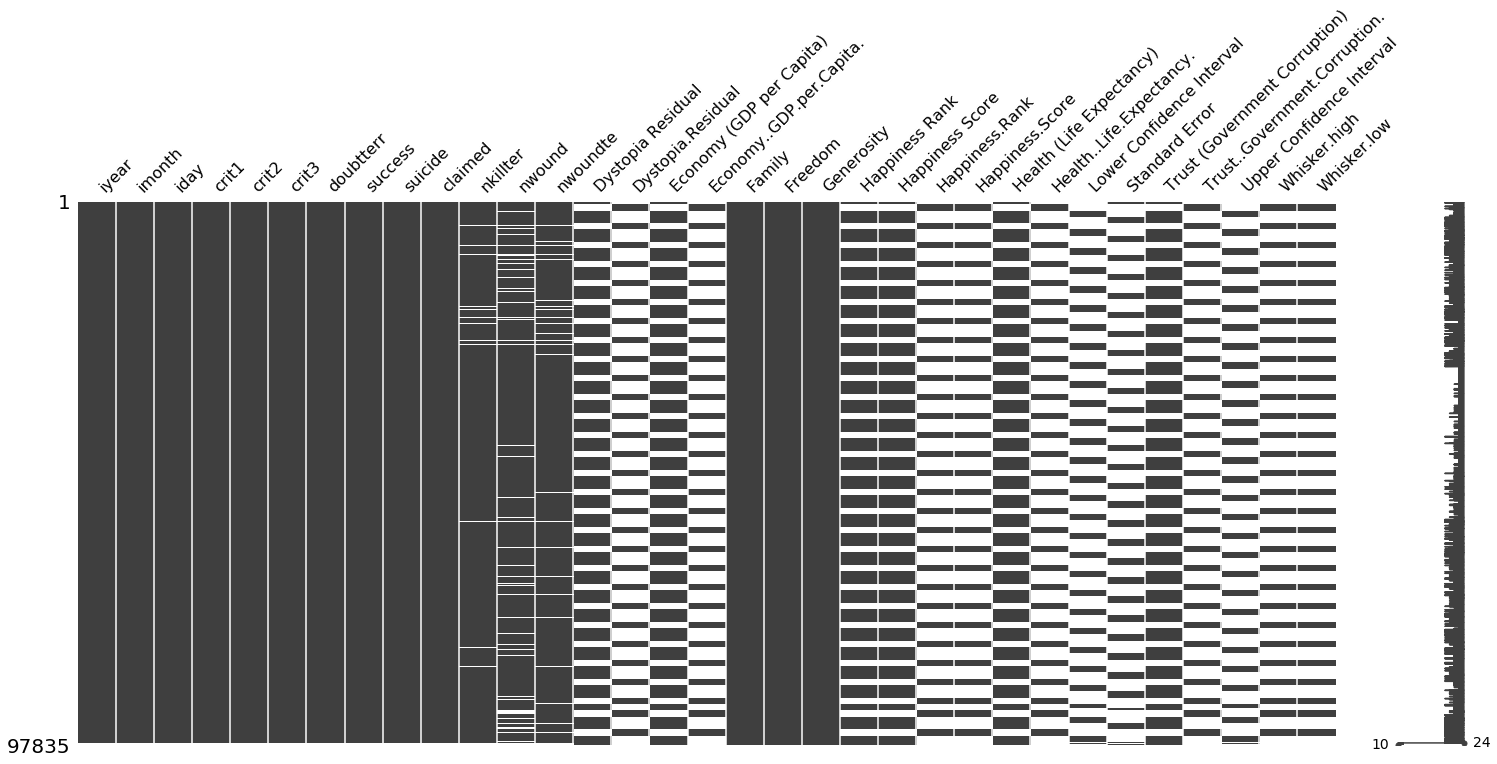

In [22]:
numeric_=data._get_numeric_data()
import pandas as pd
numeric_.isnull().sum()

import missingno as msno
msno.matrix(numeric_)
numeric_.shape

In [23]:
df=numeric_
mean_=df.fillna(df.mean()).dropna(axis=1, how='all')
print(mean_.shape)
import pandas as pd
mean_.isnull().sum()

(97835, 33)


iyear                            0
imonth                           0
iday                             0
crit1                            0
crit2                            0
crit3                            0
doubtterr                        0
success                          0
suicide                          0
claimed                          0
nkillter                         0
nwound                           0
nwoundte                         0
Dystopia Residual                0
Dystopia.Residual                0
Economy (GDP per Capita)         0
Economy..GDP.per.Capita.         0
Family                           0
Freedom                          0
Generosity                       0
Happiness Rank                   0
Happiness Score                  0
Happiness.Rank                   0
Happiness.Score                  0
Health (Life Expectancy)         0
Health..Life.Expectancy.         0
Lower Confidence Interval        0
Standard Error                   0
Trust (Government Co

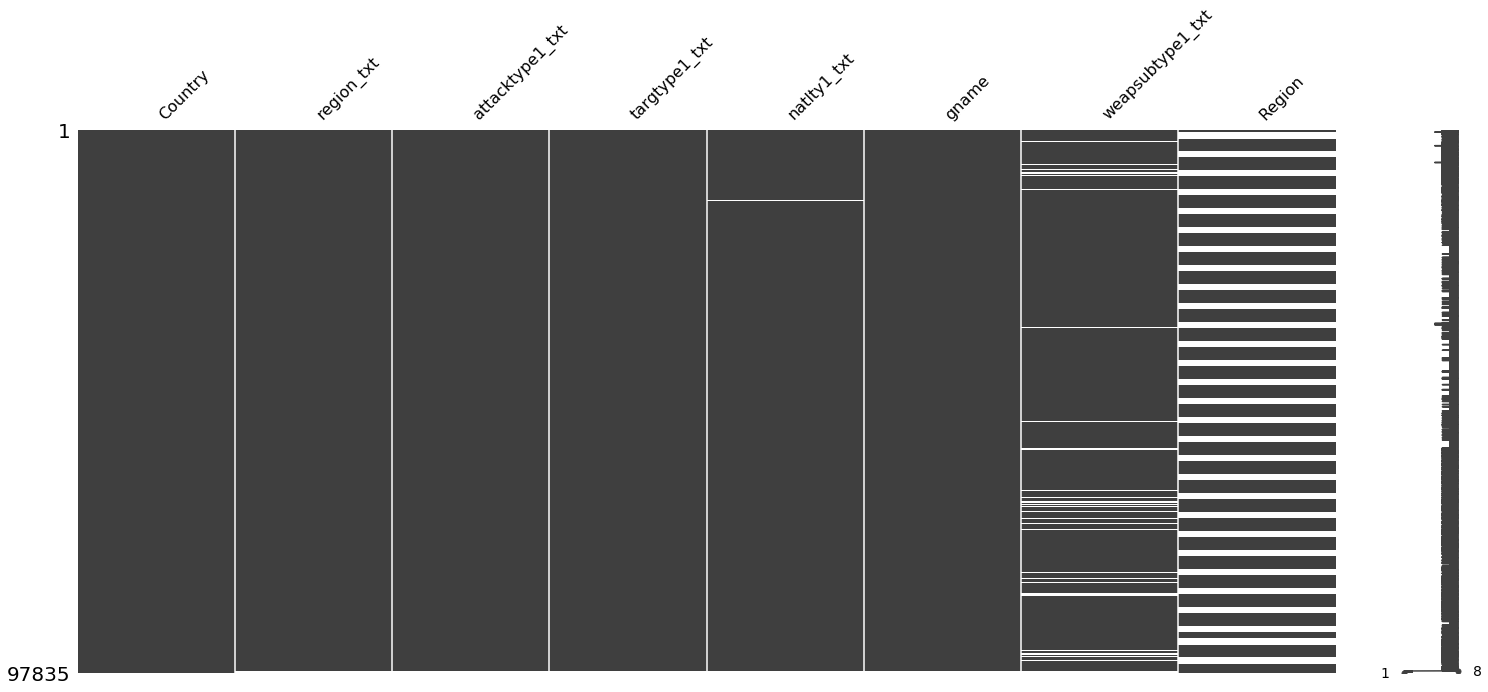

In [24]:
cat=data.select_dtypes(include='object')
import pandas as pd
cat.isnull().sum()
msno.matrix(cat)

In [25]:
cat_RemoveNan = cat.loc[:, cat.isnull().mean() <0.25]
print(cat_RemoveNan.shape)
print(cat.shape)
cat_RemoveNan

(97835, 7)
(97835, 8)


,Country,region_txt,attacktype1_txt,targtype1_txt,natlty1_txt,gname,weapsubtype1_txt
0,Yemen,Middle East & North Africa,Bombing/Explosion,Religious Figures/Institutions,Yemen,Unknown,Unknown Explosive Type
1,Yemen,Middle East & North Africa,Bombing/Explosion,Religious Figures/Institutions,Yemen,Unknown,Unknown Explosive Type
2,Yemen,Middle East & North Africa,Bombing/Explosion,Religious Figures/Institutions,Yemen,Unknown,Unknown Explosive Type
3,Yemen,Middle East & North Africa,Bombing/Explosion,Journalists & Media,Yemen,Muslim extremists,Unknown Explosive Type
4,Yemen,Middle East & North Africa,Bombing/Explosion,Journalists & Media,Yemen,Muslim extremists,Unknown Explosive Type
...,...,...,...,...,...,...,...
97830,Namibia,NaN,NaN,NaN,NaN,NaN,NaN
97831,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN
97832,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN
97833,Taiwan Province of China,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
frames = [mean_, cat_RemoveNan]
FinalData = pd.concat(frames , sort=True) 
